# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.

[0.30555556 0.25       0.19444444 0.13888889 0.08333333 0.02777778]
[0.30555556 0.55555556 0.75       0.88888889 0.97222222 1.        ]
[0.3023 0.2461 0.1976 0.1428 0.0836 0.0276]
[0.3023 0.5484 0.746  0.8888 0.9724 1.    ]


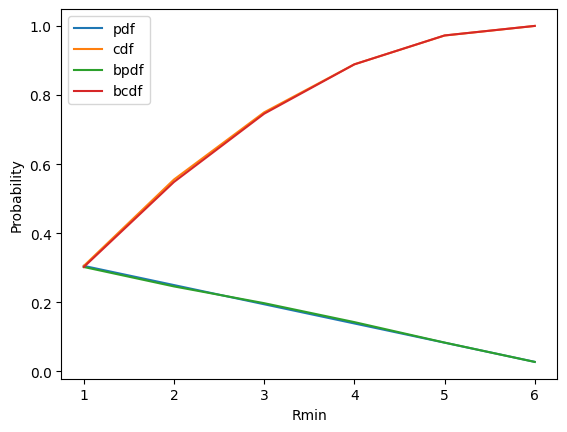

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

die=np.array([1,2,3,4,5,6])
n=10000
d1=np.random.choice(die,n)
d2=np.random.choice(die,n)
Rmin=np.minimum(d1,d2)
bcdf=np.zeros(6)
bpdf=np.zeros(6)
for x in range(6):
    bcdf[x]=np.sum(Rmin<=die[x])/n
    bpdf[x]=np.sum(Rmin==die[x])/n

cdf=np.zeros(6)
pdf=np.zeros(6)
for x in range(6):
    pdf[x]=(11-2*x)/36 #loop starts at 0, not 1 so 13-2*(x+1)=11-2*x
cdf[0]=pdf[0]
for x in range(1,6):
    cdf[x]=pdf[x]+cdf[x-1]

print(pdf)
print(cdf)
print(bpdf)
print(bcdf)

plt.plot(np.arange(1,7),pdf,label='pdf')
plt.plot(np.arange(1,7),cdf,label='cdf')
plt.plot(np.arange(1,7),bpdf,label='bpdf')
plt.plot(np.arange(1,7),bcdf,label='bcdf')
plt.xlabel('Rmin')
plt.ylabel('Probability')
plt.legend()
plt.show()

First, to calculate this empirically, we can look at the possible permutations of rolling two dice, of which there are 6*6=36 possible outcomes. For a given number n, both dice rolls need to be >=n for the minimum roll to be n. For 6, both must be 6, so p(6)=1/36. For 5, valid combinations are (5,6),(6,5), and (5,5), so p(5)=3/36. Each n adds two more combinations that can work, so p(n)=(2(7-n)-1)/36=(13-2n)/36. We can see on the graphs that the simulation matches the theoretical probabilities.


2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.

[0.07407407 0.18518519 0.24074074 0.24074074 0.18518519 0.07407407]
[0.07407407 0.25925926 0.5        0.74074074 0.92592593 1.        ]
[0.07444 0.18498 0.23973 0.2402  0.18645 0.0742 ]
[0.07444 0.25942 0.49915 0.73935 0.9258  1.     ]
3.50184


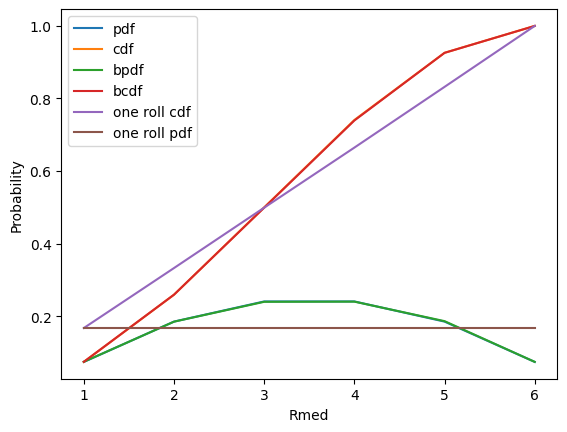

In [6]:
die=np.array([1,2,3,4,5,6])
n=100000
d1=np.random.choice(die,n)
d2=np.random.choice(die,n)
d3=np.random.choice(die,n)
Rmed=np.median(np.array([d1,d2,d3]),axis=0)

bcdf=np.zeros(6)
bpdf=np.zeros(6)
one=np.ones(6)
for x in range(6):
    bcdf[x]=np.sum(Rmed<=die[x])/n
    bpdf[x]=np.sum(Rmed==die[x])/n
    one[x]=np.sum(d1<=die[x])/n

cdf=np.zeros(6)
pdf=np.zeros(6)
for x in range(6):
    for y in range(6):
        for z in range(6):
            med=np.median([x,y,z])
            pdf[int(med)]+=1/216

cdf[0]=pdf[0]
for x in range(1,6):
    cdf[x]=pdf[x]+cdf[x-1]

print(pdf)
print(cdf)
print(bpdf)
print(bcdf)
print(np.mean(Rmed))

plt.plot(np.arange(1,7),pdf,label='pdf')
plt.plot(np.arange(1,7),cdf,label='cdf')
plt.plot(np.arange(1,7),bpdf,label='bpdf')
plt.plot(np.arange(1,7),bcdf,label='bcdf')
plt.plot(np.arange(1,7),one,label='one roll cdf')
plt.plot(np.arange(1,7),np.ones(6)/6,label='one roll pdf')
plt.xlabel('Rmed')
plt.ylabel('Probability')
plt.legend()
plt.show()

There are 6^3=216 possible outcomes of rolling the three die. To calculate the theoretical probabilities for each value being the median, I made a loop that iterated through all of these possibilities and recorded the median for each, then divided by 216 to find the probability of each value. The expected value for the median is just the mean value of the faces, which is 3.5, and the measured mean of the medians is very close to this value. We can also see that the theoretical and actual distribution functions match for sufficiently large n. Compared to the expected values for rolling a single die (all 6 sides are equally likely), we can see that values in the middle are more likely, and values on the edge are less likely. This makes sense, because while with one roll all values are equally likely, increasing the number of rolls increases the chances that one of the values will be near the middle (and for a value closer to the edge of the distribution, at least two of the values must also be close to the edge).

3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

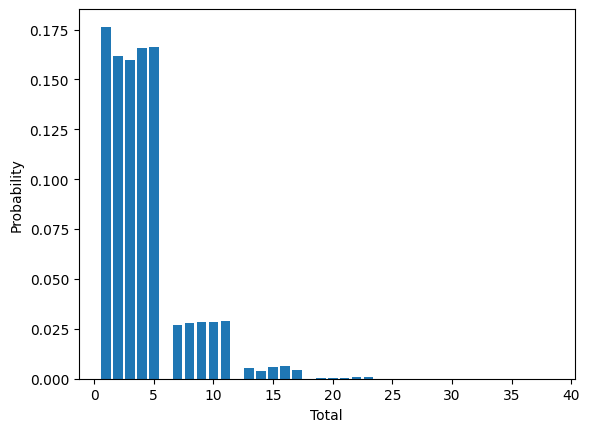

In [7]:
n=10000
die=np.array([1,2,3,4,5,6])
nums={}
for run in range(n):
    total=0
    while True:
        roll=np.random.choice(die)
        total+=roll
        if roll!=6:
            break
    if not total in nums:
        nums[total]=1
    else:
        nums[total]+=1

for key in nums:
    nums[key]/=n

plt.bar(nums.keys(),nums.values())
plt.xlabel('Total')
plt.ylabel('Probability')
plt.show()

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?

In [8]:
df=pd.read_csv('data/mammogram.csv')
df.head()

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


In [9]:
print(pd.crosstab(df['treatment'],df['breast_cancer_death']))
print(pd.crosstab(df['treatment'],df['breast_cancer_death'],normalize='index'))
print('Difference in survival rates: '+str(0.011245-0.011130))

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500
breast_cancer_death        no       yes
treatment                              
control              0.988755  0.011245
mammogram            0.988870  0.011130
Difference in survival rates: 0.00011500000000000052


2. Bootstrap the densities and distributions of survival rates for the two groups.

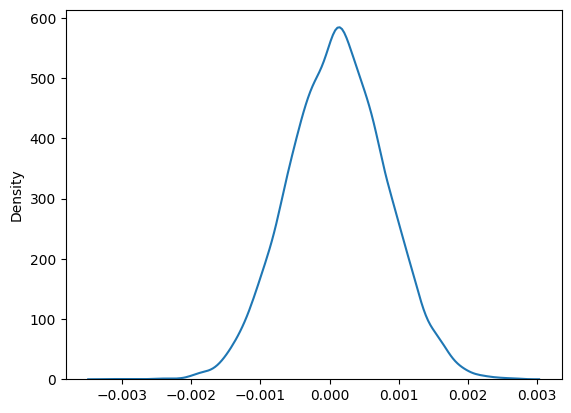

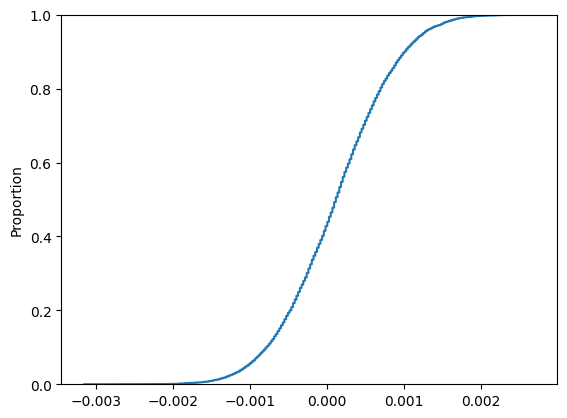

In [10]:
df['survive']=0
df.loc[df['breast_cancer_death']=='no','survive']=1
df_control=df[df['treatment']=='control']
df_mammo=df[df['treatment']=='mammogram']

n=10000
fx=[]
for x  in range(n):
    df_control_sample=df_control.sample(n=len(df_control),replace=True)
    df_mammo_sample=df_mammo.sample(n=len(df_mammo),replace=True)
    effect=np.mean(df_mammo_sample['survive'])-np.mean(df_control_sample['survive'])
    fx.append(effect)

sns.kdeplot(fx)
plt.show()
sns.ecdfplot(fx)
plt.show()

3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?

In [11]:
lower=np.quantile(fx,0.005)
upper=np.quantile(fx,0.995)
print(lower)
print(upper)

-0.0016657466667708344
0.0018960057008842262


This interval does include zero.

4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

According to this data, getting a mammmogram does not significantly affect the chances of surviving from breast cancer. That being said, the data here is fairly limited. For example, the data only shows the survival rate, but does not have data about how the cancer progresses, or how serious it is. One possibility is that mammograms could potentially catch breast cancer earlier, and limit the severity of it whether or not the patient ultimately dies. It is also unclear how the control and treatment groups were assigned. If it was not done randomly, it is possible whatever factors determined the assignment could have also influenced survival rate. For example, if mammograms were more likely to be received by patients with higher risk factors, then they may have been more likely to have more advanced forms of cancer and die than people who didnt receive any.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?